1. Import Reddit Data
2. Import Stock Data
3. Merge
4. Get vars
5. 

In [1]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [2]:
red = pd.read_csv("./data/processed_reddit_basic_v1.csv.zip", )

In [3]:
# THe 
red.shape

(451, 18)

In [5]:
stocks = pd.read_csv("./stocks/gme_daily.csv.zip", )

In [14]:
stocks = stocks.sort_values(by="date")

In [7]:
# This method of merging can be improved, 
# just because comment not on same day as stock doesn't mean stock is not affected.
merged = red.merge(stocks)

In [15]:
merged

,date,total_posts,score,awards,authors,threads,clov,sofi,wkhs,amd,gme,x,amc,clne,nio,mu,spce,bb,symbol,open,high,low,close,volume
0,2014-04-10,19,15,0.0,10,5,0,0,0,0,0,0,0,0,0,0,0,0,gme,23.59,23.640,22.88,22.88,118000
1,2014-04-11,65,173,0.0,35,11,0,0,0,0,0,0,0,0,0,0,0,0,gme,22.73,23.710,21.91,23.60,581500
2,2014-07-30,20,41,0.0,13,7,0,0,0,0,0,1,0,1,0,0,0,0,gme,22.65,22.759,22.30,22.51,153600
3,2014-07-31,25,49,0.0,15,10,0,0,0,0,0,2,0,0,0,0,0,0,gme,23.25,23.250,22.09,22.64,308900
4,2014-08-01,16,16,0.0,7,6,0,0,0,0,0,0,0,0,0,0,0,0,gme,22.68,23.080,22.58,23.00,185700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2021-06-21,567,2878,8.0,429,89,10,0,7,4,9,1,10,7,5,3,0,12,gme,61.34,63.010,53.43,55.69,185876142
298,2021-06-22,557,3076,2.0,400,113,14,2,2,5,8,1,10,7,1,0,0,10,gme,54.10,58.740,51.05,58.27,169494144
299,2021-06-23,694,4543,7.0,488,118,21,0,11,3,12,0,9,3,6,0,3,8,gme,57.04,61.100,56.80,58.30,116291804
300,2021-06-24,513,2857,5.0,397,72,18,0,12,4,1,0,6,3,0,1,1,5,gme,57.98,58.760,55.66,56.70,80351219


In [32]:
import seaborn as sn
import matplotlib.pyplot as plt

In [113]:
cors = merged.corr()[["open", "high", "low", "close", "volume"]].sort_values("volume")
new_index = list(cors.index)
 
for x in ['open','high','low','close','volume']:
    new_index.remove(x)

cors = cors.loc[new_index]
cors

,open,high,low,close,volume
mu,0.073426,0.054561,0.088050,0.070294,-0.145970
amd,-0.220566,-0.215710,-0.221842,-0.219219,-0.113938
nio,-0.262028,-0.252798,-0.266125,-0.259916,-0.093553
x,-0.148083,-0.141299,-0.156228,-0.150301,0.062503
spce,0.005846,0.010589,0.006617,0.009755,0.072567
total_posts,-0.254668,-0.232906,-0.274117,-0.254348,0.185621
clov,0.632880,0.623969,0.634171,0.624996,0.247305
sofi,0.223433,0.227108,0.216724,0.226405,0.258795
awards,0.013669,0.029951,-0.004849,0.010377,0.260039
authors,-0.225485,-0.200146,-0.249179,-0.224585,0.275024


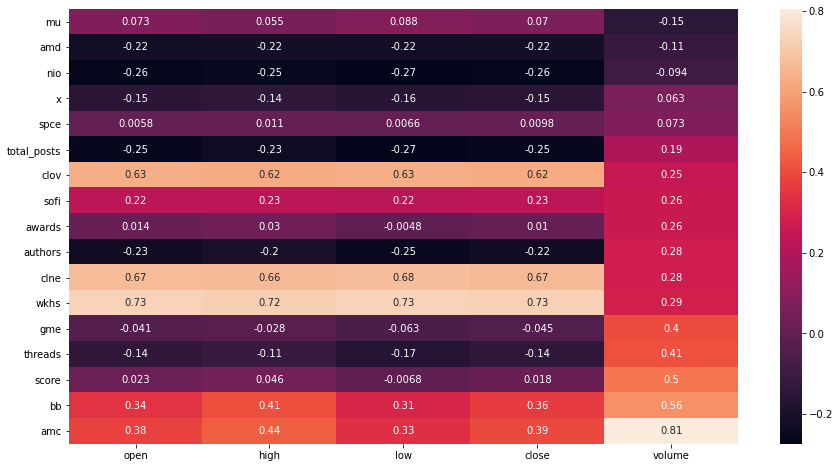

In [115]:
plt.figure(figsize=[15,8])
sn.heatmap(cors, annot=True)
plt.show()

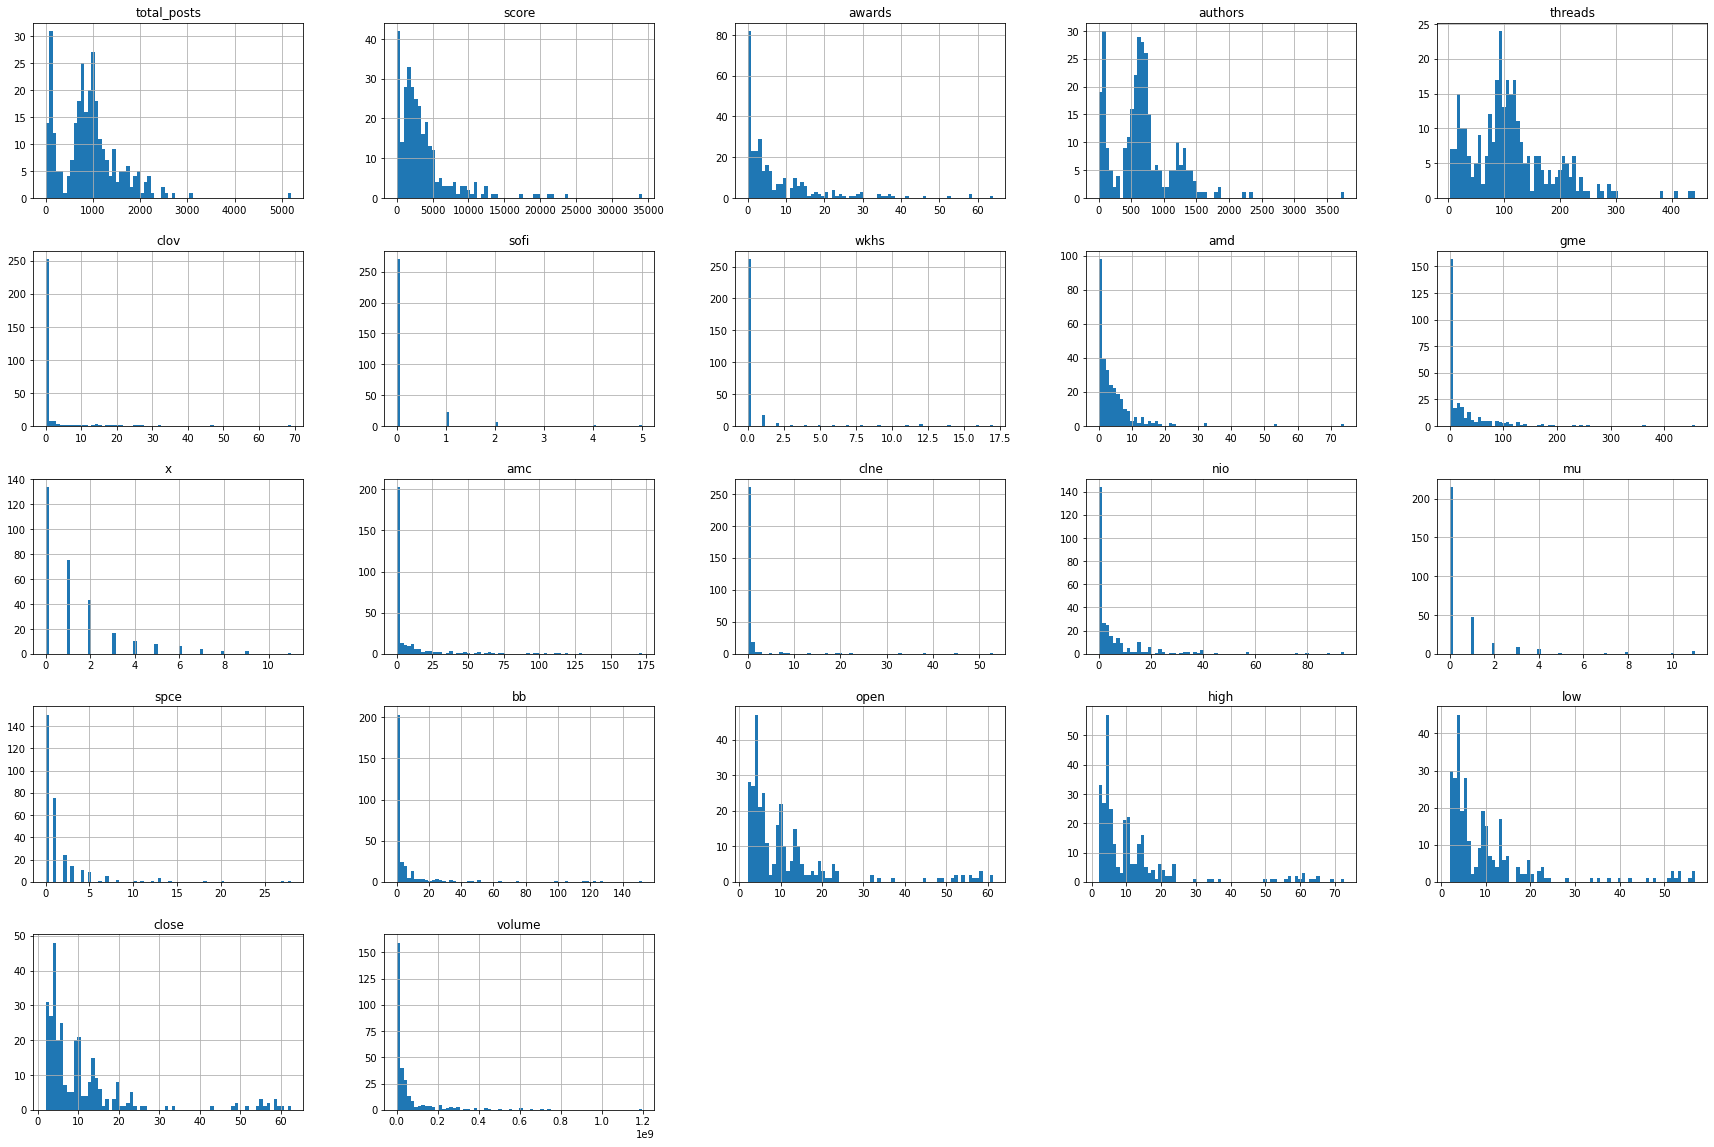

In [139]:
merged.hist(figsize=[30,20],bins=70)
plt.show()

In [5]:
red_tfidf = pd.read_csv("./data/processed_reddit_basic_v3_tfidf.csv.zip", )

In [20]:
red_tfidf["tfidf"][100][1]

' '